# Submitted by: 
# Mohamad Marouni123
# Data Description:
## Data provided is taken from 3 sources wundergound, metoblue, rkp5. Data consist of 9 features related to weather forecasting from 2018 to 2020
# Main Task:
## Forecast the wind speed for different locations in the UK

# 1. Loading Libraries


In [61]:
#Pre-Processing Libraries
import math
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
from numpy.random import seed
import statsmodels.api as sm
import statsmodels.formula.api as smf

#Tensorflow & Keras libraries
seed(1)
import tensorflow
tensorflow.random.set_seed(1)
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.wrappers.scikit_learn import KerasRegressor 
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping

#Scikit-Learn Librariers
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings('ignore')

# 2.Data Pre-Processing

## 2.1. Loading Data

In [2]:
df=pd.read_excel('data.xlsx')
df.head()

,Date,Temp,Dew Point,Humidity,Wind Speed,Pressure,Wind Direction,Pressure Grad,Wind Gradient
0,2020-01-01,5.7,4.8,94.4,2.47,1029.0,128,-8,3
1,2020-01-02,9.3,8.2,92.5,7.42,1021.4,188,0,8
2,2020-01-03,8.2,6.8,91.4,6.81,1021.8,265,11,7
3,2020-01-04,5.6,3.6,87.2,3.94,1033.7,248,-1,2
4,2020-01-05,7.8,6.1,89.2,3.33,1033.4,224,-11,5


## 2.1.1. Data at first sight

In [3]:
df.head()
df.tail()

,Date,Temp,Dew Point,Humidity,Wind Speed,Pressure,Wind Direction,Pressure Grad,Wind Gradient
0,2020-01-01,5.7,4.8,94.4,2.47,1029.0,128,-8,3
1,2020-01-02,9.3,8.2,92.5,7.42,1021.4,188,0,8
2,2020-01-03,8.2,6.8,91.4,6.81,1021.8,265,11,7
3,2020-01-04,5.6,3.6,87.2,3.94,1033.7,248,-1,2
4,2020-01-05,7.8,6.1,89.2,3.33,1033.4,224,-11,5


,Date,Temp,Dew Point,Humidity,Wind Speed,Pressure,Wind Direction,Pressure Grad,Wind Gradient
1091,2018-12-27,2.9,2.6,98.0,1.42,1025.7,235,4,1
1092,2018-12-28,4.6,4.3,97.5,1.86,1030.1,261,2,3
1093,2018-12-29,8.9,7.9,93.8,4.11,1032.2,255,2,4
1094,2018-12-30,7.0,7.0,99.9,2.75,1034.8,260,0,3
1095,2018-12-31,8.4,7.5,93.6,2.42,1035.2,280,2,3


## 2.1.2. Number of rows and columns in the dataframe 

In [4]:
df.shape

(1096, 9)

## The data consist of 9 columns and 1096 rows

## 2.2. Data type 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1096 entries, 0 to 1095
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1096 non-null   object 
 1   Temp            1096 non-null   float64
 2   Dew Point       1092 non-null   float64
 3   Humidity        1091 non-null   float64
 4   Wind Speed      1087 non-null   float64
 5   Pressure        1096 non-null   float64
 6   Wind Direction  1096 non-null   int64  
 7   Pressure Grad   1096 non-null   int64  
 8   Wind Gradient   1096 non-null   int64  
dtypes: float64(5), int64(3), object(1)
memory usage: 77.2+ KB


## Data is formed from float numbers, integers, and objects

## 2.3. Statistical describtion for the numerical values

In [6]:
df.describe()

,Temp,Dew Point,Humidity,Wind Speed,Pressure,Wind Direction,Pressure Grad,Wind Gradient
count,1096.000000,1092.000000,1091.000000,1087.000000,1096.000000,1096.000000,1096.000000,1096.000000
mean,11.742245,9.011172,84.016627,5.930791,1014.446624,184.674270,-0.435219,4.807482
std,4.933582,4.763136,8.827645,2.491654,10.581680,69.980824,6.635824,2.068767
min,-2.600000,-9.200000,26.400000,1.220000,974.100000,18.000000,-39.000000,0.000000
25%,8.075000,5.600000,79.200000,4.030000,1008.175000,138.000000,-4.000000,3.000000
50%,11.300000,9.000000,85.000000,5.500000,1015.400000,197.500000,-1.000000,4.000000
75%,15.700000,12.700000,90.150000,7.390000,1021.500000,235.250000,3.000000,6.000000
max,25.100000,19.500000,100.000000,17.690000,1047.100000,339.000000,30.000000,15.000000


## 2.4. Null Values check

In [7]:
df.isnull().sum()

Date              0
Temp              0
Dew Point         4
Humidity          5
Wind Speed        9
Pressure          0
Wind Direction    0
Pressure Grad     0
Wind Gradient     0
dtype: int64

## Misiing values are found in columns(Dew Point, Humidity, and Wind Speed)

## percentage of missing values per column

In [8]:
missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/1096)*100})
missing_data

,total_missing,perc_missing
Date,0,0.000000
Temp,0,0.000000
Dew Point,4,0.364964
Humidity,5,0.456204
Wind Speed,9,0.821168
Pressure,0,0.000000
Wind Direction,0,0.000000
Pressure Grad,0,0.000000
Wind Gradient,0,0.000000


## 2.4.1. Substitue null values with the mean value

In [9]:
#Fill the missing values with mean calculated for each column
df.fillna(df.mean(), inplace=True)

In [10]:
#No NaN values in the data 
df.isnull().sum()

Date              0
Temp              0
Dew Point         0
Humidity          0
Wind Speed        0
Pressure          0
Wind Direction    0
Pressure Grad     0
Wind Gradient     0
dtype: int64

## 2.5. Divide the Date column into 3 columns(Year, Month, Day)

In [11]:
df['Year']  = df['Date'].apply(lambda x: int(str(x)[:4]))
df['Month'] = df['Date'].apply(lambda x: int(str(x)[5:7]))
df['Day']=df['Date'].apply(lambda x: int(str(x)[8:10]))
df.head()

,Date,Temp,Dew Point,Humidity,Wind Speed,Pressure,Wind Direction,Pressure Grad,Wind Gradient,Year,Month,Day
0,2020-01-01,5.7,4.8,94.4,2.47,1029.0,128,-8,3,2020,1,1
1,2020-01-02,9.3,8.2,92.5,7.42,1021.4,188,0,8,2020,1,2
2,2020-01-03,8.2,6.8,91.4,6.81,1021.8,265,11,7,2020,1,3
3,2020-01-04,5.6,3.6,87.2,3.94,1033.7,248,-1,2,2020,1,4
4,2020-01-05,7.8,6.1,89.2,3.33,1033.4,224,-11,5,2020,1,5


## 1.5.1. Divide the date column into 3 columns days, months, and years

In [12]:
del df['Date']
df.head()

,Temp,Dew Point,Humidity,Wind Speed,Pressure,Wind Direction,Pressure Grad,Wind Gradient,Year,Month,Day
0,5.7,4.8,94.4,2.47,1029.0,128,-8,3,2020,1,1
1,9.3,8.2,92.5,7.42,1021.4,188,0,8,2020,1,2
2,8.2,6.8,91.4,6.81,1021.8,265,11,7,2020,1,3
3,5.6,3.6,87.2,3.94,1033.7,248,-1,2,2020,1,4
4,7.8,6.1,89.2,3.33,1033.4,224,-11,5,2020,1,5


## Final shape of the dataframe

In [13]:
df.shape

(1096, 11)

## 11 Columns and 1096 rows

## 2.6. Create 2 variables X & Y. X represents the input features and Y represent the output feature

In [14]:
X = df.drop(['Wind Speed'], axis=1)
#Assign the Target column as the output 
Y= df['Wind Speed']

## 2.7. Input features Normalization

In [15]:
X_norm=(X-X.min())/(X.max()-X.min())

## All input features are between 0 and 1

In [16]:
X_norm

,Temp,Dew Point,Humidity,Pressure,Wind Direction,Pressure Grad,Wind Gradient,Year,Month,Day
0,0.299639,0.487805,0.923913,0.752055,0.342679,0.449275,0.200000,1.0,0.0,0.000000
1,0.429603,0.606272,0.898098,0.647945,0.529595,0.565217,0.533333,1.0,0.0,0.033333
2,0.389892,0.557491,0.883152,0.653425,0.769470,0.724638,0.466667,1.0,0.0,0.066667
3,0.296029,0.445993,0.826087,0.816438,0.716511,0.550725,0.133333,1.0,0.0,0.100000
4,0.375451,0.533101,0.853261,0.812329,0.641745,0.405797,0.333333,1.0,0.0,0.133333
...,...,...,...,...,...,...,...,...,...,...
1091,0.198556,0.411150,0.972826,0.706849,0.676012,0.623188,0.066667,0.0,1.0,0.866667
1092,0.259928,0.470383,0.966033,0.767123,0.757009,0.594203,0.200000,0.0,1.0,0.900000
1093,0.415162,0.595819,0.915761,0.795890,0.738318,0.594203,0.266667,0.0,1.0,0.933333
1094,0.346570,0.564460,0.998641,0.831507,0.753894,0.565217,0.200000,0.0,1.0,0.966667


## 2.8. Data split 70% training and 30% testing

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_norm, Y, test_size=0.3, random_state=0)

## x_train shape

In [18]:
x_train.head()
x_train.tail()

,Temp,Dew Point,Humidity,Pressure,Wind Direction,Pressure Grad,Wind Gradient,Year,Month,Day
458,0.267148,0.400697,0.794837,0.334247,0.753894,0.536232,0.466667,0.5,0.272727,0.066667
181,0.671480,0.860627,0.960598,0.464384,0.641745,0.536232,0.333333,1.0,0.454545,0.966667
427,0.476534,0.662021,0.937500,0.358904,0.626168,0.478261,0.666667,0.5,0.181818,0.066667
815,0.350181,0.456446,0.745924,0.580822,0.806854,0.434783,0.200000,0.0,0.181818,0.833333
9,0.342960,0.477352,0.796196,0.665753,0.785047,0.608696,0.266667,1.0,0.000000,0.300000


,Temp,Dew Point,Humidity,Pressure,Wind Direction,Pressure Grad,Wind Gradient,Year,Month,Day
1033,0.346570,0.505226,0.847826,0.287671,0.869159,0.724638,0.466667,0.0,0.818182,0.966667
763,0.256318,0.390244,0.779891,0.479452,0.894081,0.536232,0.466667,0.0,0.090909,0.033333
835,0.483755,0.644599,0.879076,0.493151,0.408100,0.623188,0.266667,0.0,0.272727,0.466667
559,0.729242,0.836237,0.783967,0.638356,0.607477,0.579710,0.200000,0.5,0.545455,0.400000
684,0.324910,0.494774,0.873641,0.356164,0.433022,0.637681,0.400000,0.5,0.909091,0.466667


In [19]:
x_train.shape

(767, 10)

## y_train shape

In [20]:
y_train.shape

(767,)

In [21]:
y_train.head()
y_train.tail()

458     2.33
181     8.33
427    13.06
815     3.53
9       4.83
Name: Wind Speed, dtype: float64

1033    7.11
763     5.94
835     4.44
559     3.56
684     6.81
Name: Wind Speed, dtype: float64

# 3. Data Visualization

## 3.1. Loading Libraries

In [63]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import lineplot
from seaborn import countplot
from seaborn import distplot
from seaborn import boxplot
from seaborn import scatterplot
from matplotlib import pyplot
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 3.2. Linplots for the mean of each feature over 12 months 

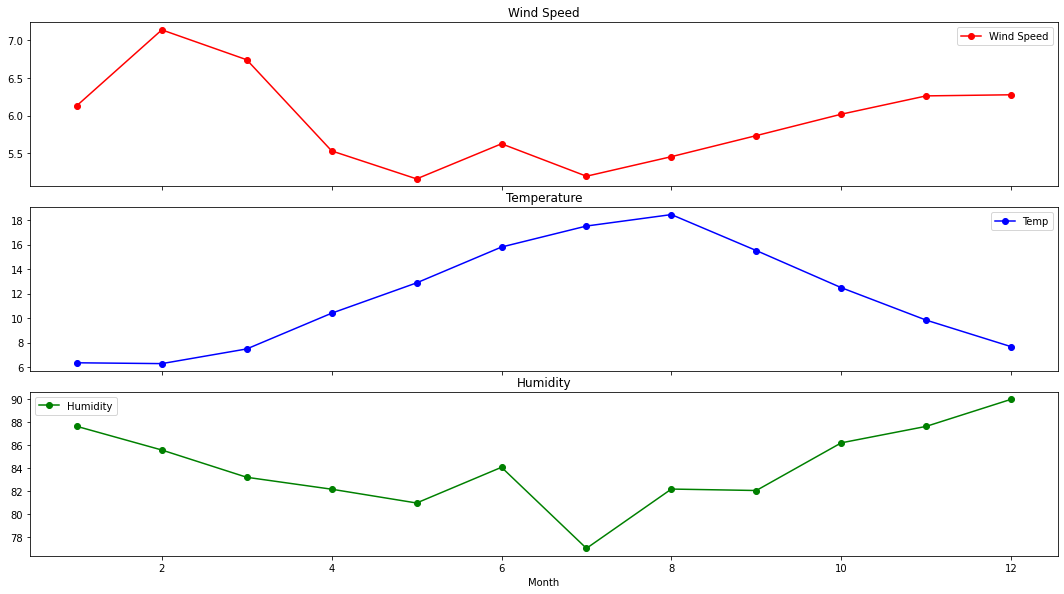

In [50]:
# group by date and get average sales, and percent change
avg_ws   = df.groupby('Month')["Wind Speed"].mean()
avg_t   = df.groupby('Month')["Temp"].mean()
avg_h   = df.groupby('Month')["Humidity"].mean()
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
fig, (ax1, ax2, ax3)=plt.subplots(3,1,sharex=True,figsize=(15,8))
fig.tight_layout()
ax1 = avg_ws.plot(legend=True,ax=ax1,marker='o',title="Wind Speed", color='red')
ax2 = avg_t.plot(legend=True,ax=ax2,marker='o',title="Temperature", color='Blue')
ax3 = avg_h.plot(legend=True,ax=ax3,marker='o',title="Humidity", color='green')
plt.show()

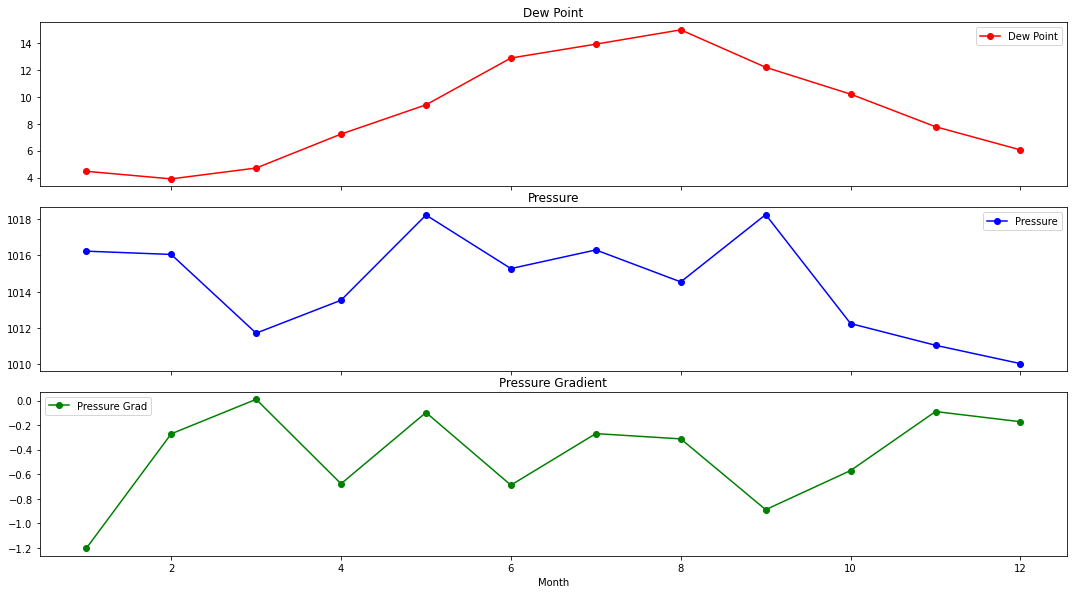

In [52]:
# group by date and get average sales, and percent change
avg_dp  = df.groupby('Month')["Dew Point"].mean()
avg_p   = df.groupby('Month')["Pressure"].mean()
avg_pg   = df.groupby('Month')["Pressure Grad"].mean()
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
fig, (ax1, ax2, ax3)=plt.subplots(3,1,sharex=True,figsize=(15,8))
fig.tight_layout()
ax1 = avg_dp.plot(legend=True,ax=ax1,marker='o',title="Dew Point", color='red')
ax2 = avg_p.plot(legend=True,ax=ax2,marker='o',title="Pressure", color='Blue')
ax3 = avg_pg.plot(legend=True,ax=ax3,marker='o',title="Pressure Gradient", color='green')
plt.show()

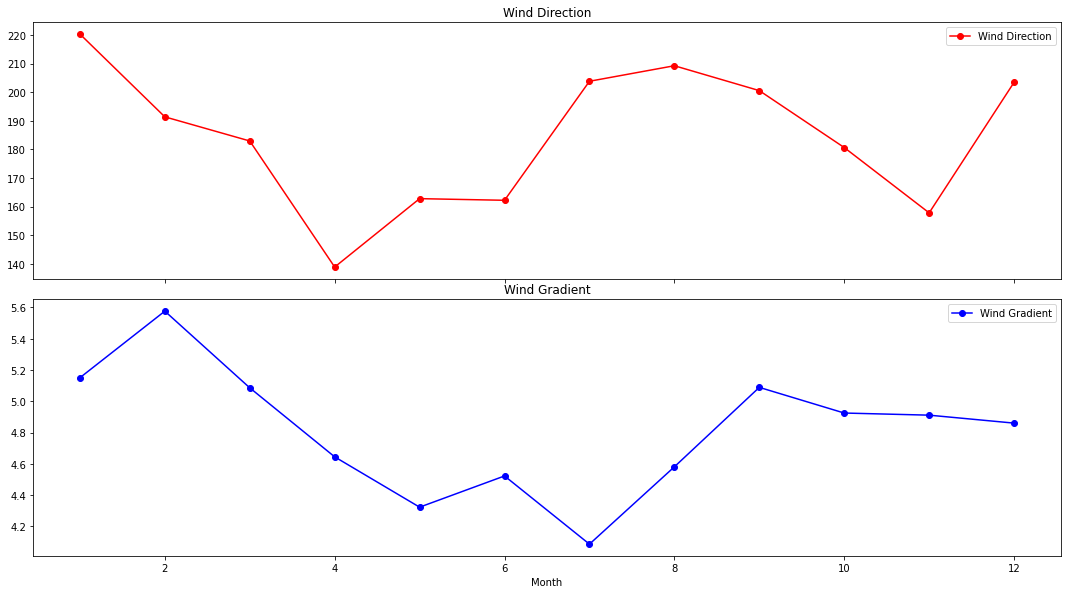

In [54]:
# group by date and get average sales, and percent change
avg_wd   = df.groupby('Month')["Wind Direction"].mean()
avg_wg   = df.groupby('Month')["Wind Gradient"].mean()
month=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
fig, (ax1, ax2)=plt.subplots(2,1,sharex=True,figsize=(15,8))
fig.tight_layout()
ax1 = avg_wd.plot(legend=True,ax=ax1,marker='o',title="Wind Direction", color='red')
ax2 = avg_wg.plot(legend=True,ax=ax2,marker='o',title="Wind Gradient", color='Blue')
plt.show()

## 3.3. Boxplot for features numerical distrbution

<AxesSubplot:xlabel='Temp'>

<AxesSubplot:xlabel='Dew Point'>

<AxesSubplot:xlabel='Humidity'>

<AxesSubplot:xlabel='Wind Speed'>

<AxesSubplot:xlabel='Pressure'>

<AxesSubplot:xlabel='Wind Direction'>

<AxesSubplot:xlabel='Pressure Grad'>

<AxesSubplot:xlabel='Wind Gradient'>

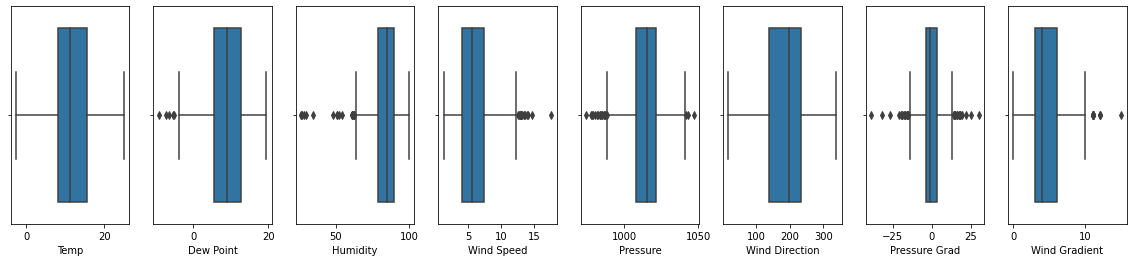

In [62]:

fig, (ax1,ax2,ax3,ax4,ax5,ax6, ax7, ax8) = plt.subplots(1,8,figsize=(20,4))
sns.boxplot( df['Temp'],ax=ax1)
sns.boxplot( df['Dew Point'],ax=ax2)
sns.boxplot( df['Humidity'], ax=ax3)
sns.boxplot( df['Wind Speed'], ax=ax4)
sns.boxplot( df['Pressure'], ax=ax5)
sns.boxplot( df['Wind Direction'], ax=ax6)
sns.boxplot( df['Pressure Grad'],ax=ax7)
sns.boxplot( df['Wind Gradient'],ax=ax8)

## 3.3. Correlation of the features according to the correlation factor

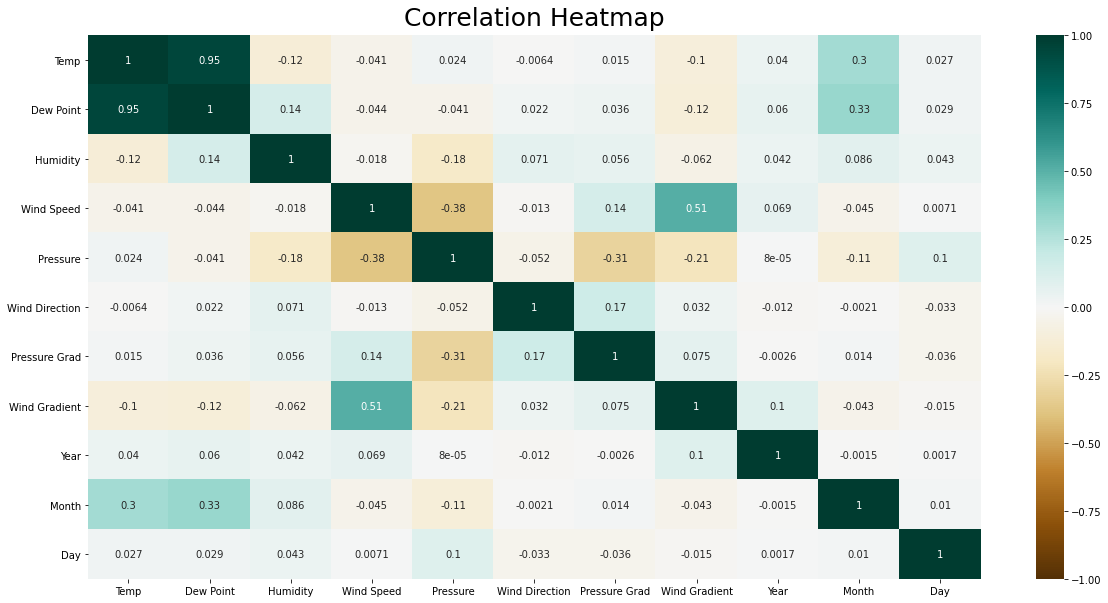

In [68]:
plt.figure(figsize = (20,10))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':25}, pad=10);

# 4.Model Setup

## 4.1. Intialize the model
## Model is formed of input layer with 10 neurons, Hidden layer with 32 neurons, and output layer with one neuron
## 20% dropout function is used
## ADAM Optimizer
## Learning rate=1e-3
## Decay rate=1e-3

In [ ]:
model = Sequential()
model.add(Dense(32, input_dim=x_train.shape[1], activation="sigmoid", kernel_initializer='normal'))
model.add(Dropout(0.2)) #dropping a few neurons for generalizing the model
model.add(Dense(1, activation="linear", kernel_initializer='normal'))
adam = Adam(learning_rate=1e-3, decay=1e-3)

## 4.2. Compile model
## Evalution metrics: Mean absolute error(MAE) & Mean squared error(MSE)

In [ ]:
# Compile model
model.compile(loss="mean_squared_error", optimizer='adam', metrics=['mse','mae'])

## 4.3. Model fitting
## Best fit weights are save in the filepath
## Early stopping with patience=100 and moniotr=val_mae
## Epochs=1000
## Batch_size=30


In [ ]:
print('Fit model...')
filepath="/home/m-marouni/Documents/CE-901/Heathrow/best_weights"
checkpoint = ModelCheckpoint(filepath, monitor='val_mae', verbose=1, save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_mae', patience=100, verbose=1, mode='min')
callbacks_list = [checkpoint, early_stopping]

log = model.fit(x_train, y_train,
          validation_split=0.40, batch_size=30, epochs=1000, shuffle=True, callbacks=callbacks_list)

Fit model...
Epoch 1/1000
16/16 [==============================] - 12s 35ms/step - loss: 43.2680 - mse: 43.2680 - mae: 6.0316 - val_loss: 36.3023 - val_mse: 36.3023 - val_mae: 5.5149

Epoch 00001: val_mae improved from inf to 5.51492, saving model to /home/m-marouni/Documents/CE-901/Heathrow/best_weights
INFO:tensorflow:Assets written to: /home/m-marouni/Documents/CE-901/Heathrow/best_weights/assets
Epoch 2/1000
16/16 [==============================] - 0s 3ms/step - loss: 40.8408 - mse: 40.8408 - mae: 5.8643 - val_loss: 33.1300 - val_mse: 33.1300 - val_mae: 5.2193

Epoch 00002: val_mae improved from 5.51492 to 5.21931, saving model to /home/m-marouni/Documents/CE-901/Heathrow/best_weights
INFO:tensorflow:Assets written to: /home/m-marouni/Documents/CE-901/Heathrow/best_weights/assets
Epoch 3/1000
16/16 [==============================] - 0s 4ms/step - loss: 37.5189 - mse: 37.5189 - mae: 5.5960 - val_loss: 30.0489 - val_mse: 30.0489 - val_mae: 4.9152

Epoch 00003: val_mae improved from 5

## The minimum error reached after 1000 epochs is VAL_MAE=1.50

## 4.4. Evalution metrics plots

In [ ]:
def show_info(model, X, y, log, weights = None):
    '''
    Show metrics about the evaluation model and plots about loss, rmse and rmspe
    '''
    if (log != None):
        # summarize history for loss
        plt.figure(figsize=(14,10))
        plt.plot(log.history['loss'])
        plt.plot(log.history['val_loss'])
        plt.title('Model Loss')
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')

        # summarize history for MAE
        plt.figure(figsize=(14,10))
        plt.plot(log.history['mae'])
        plt.plot(log.history['val_mae'])
        plt.title('Model MAE')
        plt.ylabel('MAE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')

         # summarize history for MSE
        plt.figure(figsize=(14,10))
        plt.plot(log.history['mse'])
        plt.plot(log.history['val_mse'])
        plt.title('Model MSE')
        plt.ylabel('MSE')
        plt.xlabel('epoch')
        plt.legend(['train', 'test'], loc='upper left')
        plt.show()
        print('\n')
    if (weights != None):
        model.load_weights(weights)
    
    predictions = model.predict(X, verbose=1)

    mse = mean_squared_error(y, predictions)
    mae= mean_absolute_error(y, predictions)

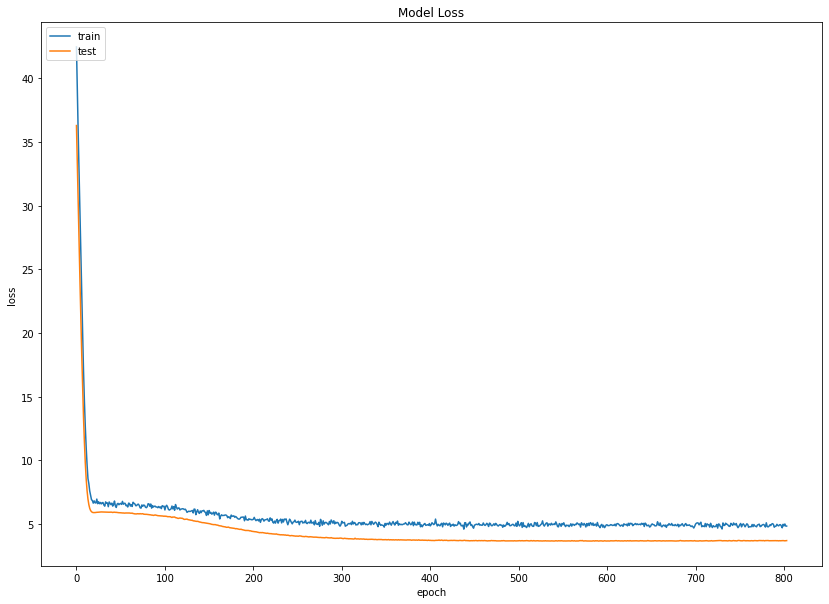

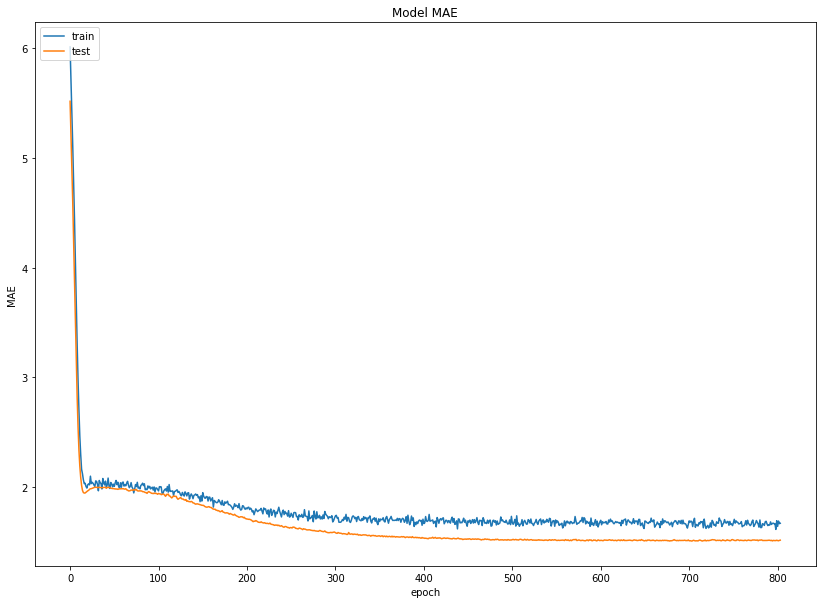

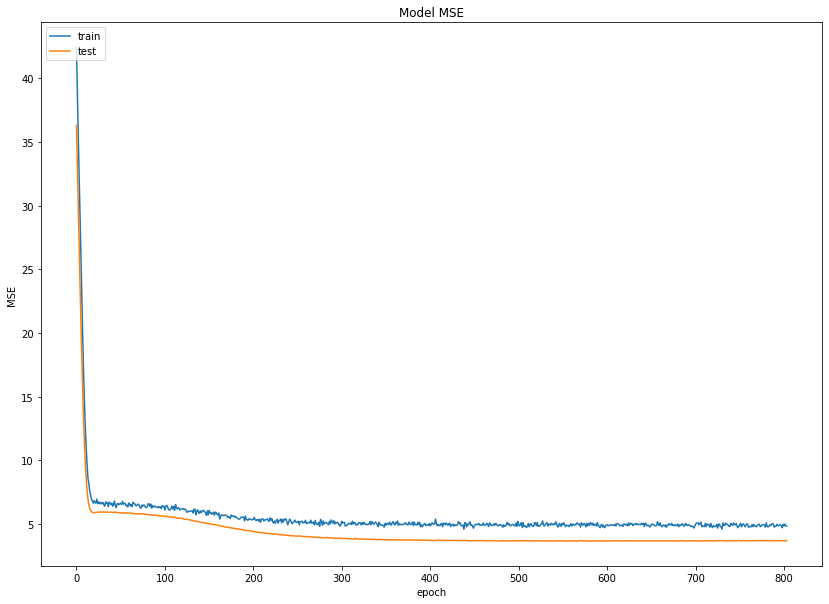



11/11 [==============================] - 0s 3ms/step


In [ ]:
show_info(model, x_test, y_test, log, weights='/home/m-marouni/Documents/CE-901/Heathrow/best_weights')